# Housing-Visualisation - project 8

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
vis_cen = pd.read_csv('../cleandata/census_clean.csv', usecols = ['State/UT', 'District', 'Population', 'Households'])
vis_cen.head()

,State/UT,District,Population,Households
0,Jammu and Kashmir,Kupwara,870354.0,181664.0
1,Jammu and Kashmir,Badgam,753745.0,187839.0
2,Laddakh,Leh(Ladakh),133487.0,54394.0
3,Laddakh,Kargil,140802.0,48144.0
4,Jammu and Kashmir,Punch,476835.0,147408.0


In [12]:
vis_house = pd.read_csv('../cleandata/housing_clean.csv')
vis_house.head()

,State/UT,District,Households_Rural_Toilet_Premise,Households_Urban_Toilet_Premise,Households_Rural_Dilapidated,Households_Urban_Dilapidated,Households_Rural_Livable,Households_Urban_Livable,Households_Rural,Households_Urban
0,Andaman and Nicobar Islands,Nicobars,12910,0,191,0,3798,0,15958,0
1,Andaman and Nicobar Islands,South Andaman,22580,44454,1221,607,11691,10835,34901,50631
2,Andhra Pradesh,Adilabad,82450,155715,38835,6166,213295,51758,597466,220248
3,Andhra Pradesh,Anantapur,198659,260170,26186,4438,195950,71359,902997,341431
4,Andhra Pradesh,Chittoor,23669,322658,4468,4750,27051,58197,120763,395900


In [14]:
vis_merge = vis_cen.merge(vis_house, on=['State/UT','District'], how='inner')
vis_merge.head()

,State/UT,District,Population,Households,Households_Rural_Toilet_Premise,Households_Urban_Toilet_Premise,Households_Rural_Dilapidated,Households_Urban_Dilapidated,Households_Rural_Livable,Households_Urban_Livable,Households_Rural,Households_Urban
0,Jammu and Kashmir,Kupwara,870354.0,181664.0,77476,16304,13150,1114,92052,11496,158438,23226
1,Jammu and Kashmir,Badgam,753745.0,187839.0,133820,24579,6265,706,74380,9190,160649,27190
2,Laddakh,Leh(Ladakh),133487.0,54394.0,32526,16740,775,192,19013,9540,36920,17474
3,Laddakh,Kargil,140802.0,48144.0,39078,7579,1412,93,29591,5348,40370,7774
4,Jammu and Kashmir,Punch,476835.0,147408.0,18103,11497,3171,122,78622,4168,132139,15269


In [15]:
def plot_bars(x, y, y_label, title):
    _, ax = plt.subplots(figsize=(12,8))
    ax.bar(x, y)
    ax.set_ylabel(y_label)
    ax.set_xticklabels(x, rotation=90)
    plt.title(title)
    plt.show()

C:\Users\Miles\AppData\Local\Temp\ipykernel_19928\2445431557.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  state_df = (vis_merge.groupby('State/UT')['Population', 'Households'].sum()).reset_index()
C:\Users\Miles\AppData\Local\Temp\ipykernel_19928\3365000646.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=90)


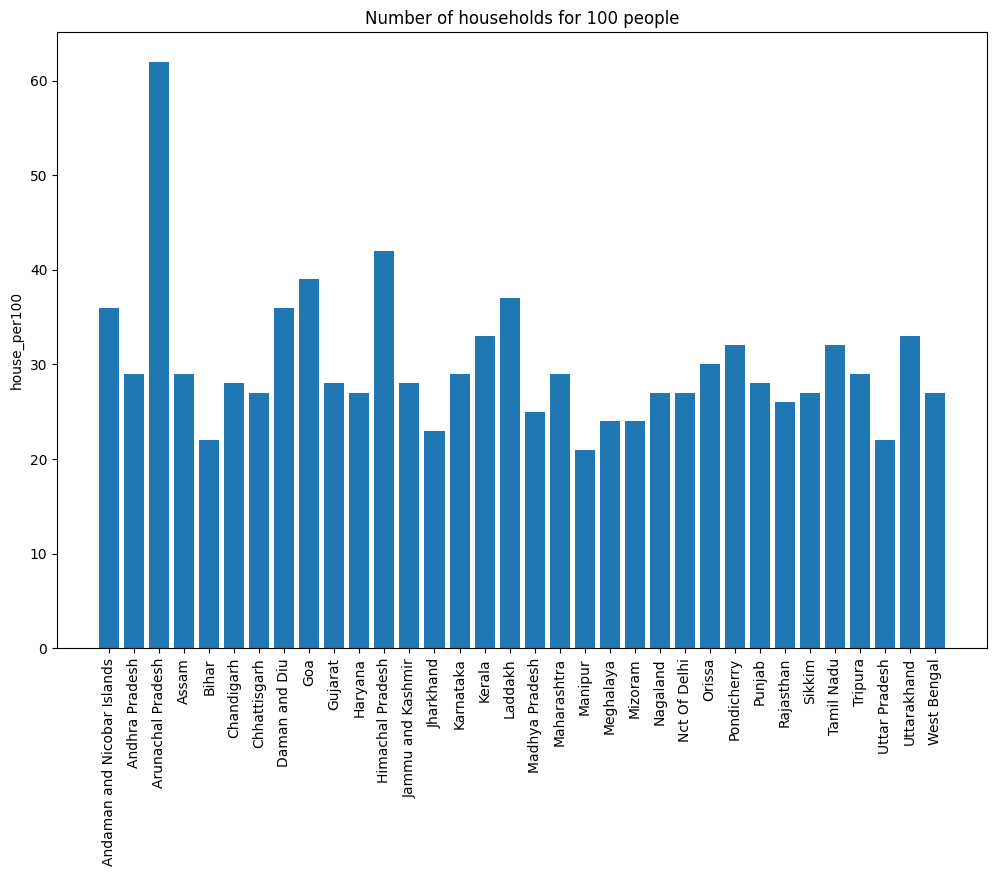

In [16]:
state_df = (vis_merge.groupby('State/UT')['Population', 'Households'].sum()).reset_index()
house_per100 = [int(100*i) for i in state_df['Households']/state_df['Population']]
states = [i for i in state_df['State/UT']]

plot_bars(states, house_per100, y_label='house_per100', title='Number of households for 100 people')

C:\Users\Miles\AppData\Local\Temp\ipykernel_19928\3623297930.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  toilet2house_df = (vis_merge.groupby('State/UT')['Households', 'Households_Rural_Toilet_Premise', 'Households_Urban_Toilet_Premise'].sum()).reset_index()
C:\Users\Miles\AppData\Local\Temp\ipykernel_19928\3365000646.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=90)


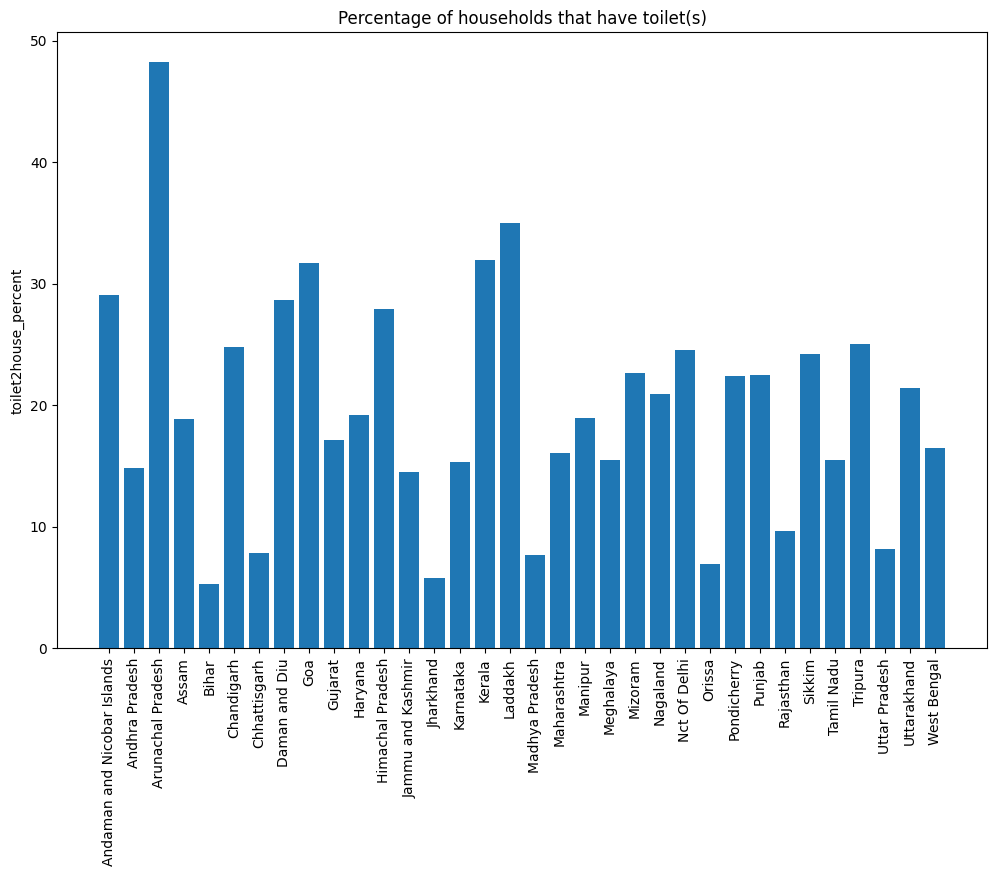

In [17]:
toilet2house_df = (vis_merge.groupby('State/UT')['Households', 'Households_Rural_Toilet_Premise', 'Households_Urban_Toilet_Premise'].sum()).reset_index()
toilet_per_house = [round(100*i, 2) for i in (toilet2house_df['Households_Rural_Toilet_Premise']+toilet2house_df['Households_Urban_Toilet_Premise'])/state_df['Population']]

plot_bars(states, toilet_per_house, y_label='toilet2house_percent', title='Percentage of households that have toilet(s)')


C:\Users\Miles\AppData\Local\Temp\ipykernel_19928\609046923.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  urban2rural_df = (vis_merge.groupby('State/UT')['Households', 'Households_Rural', 'Households_Urban'].sum()).reset_index()
C:\Users\Miles\AppData\Local\Temp\ipykernel_19928\3365000646.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=90)


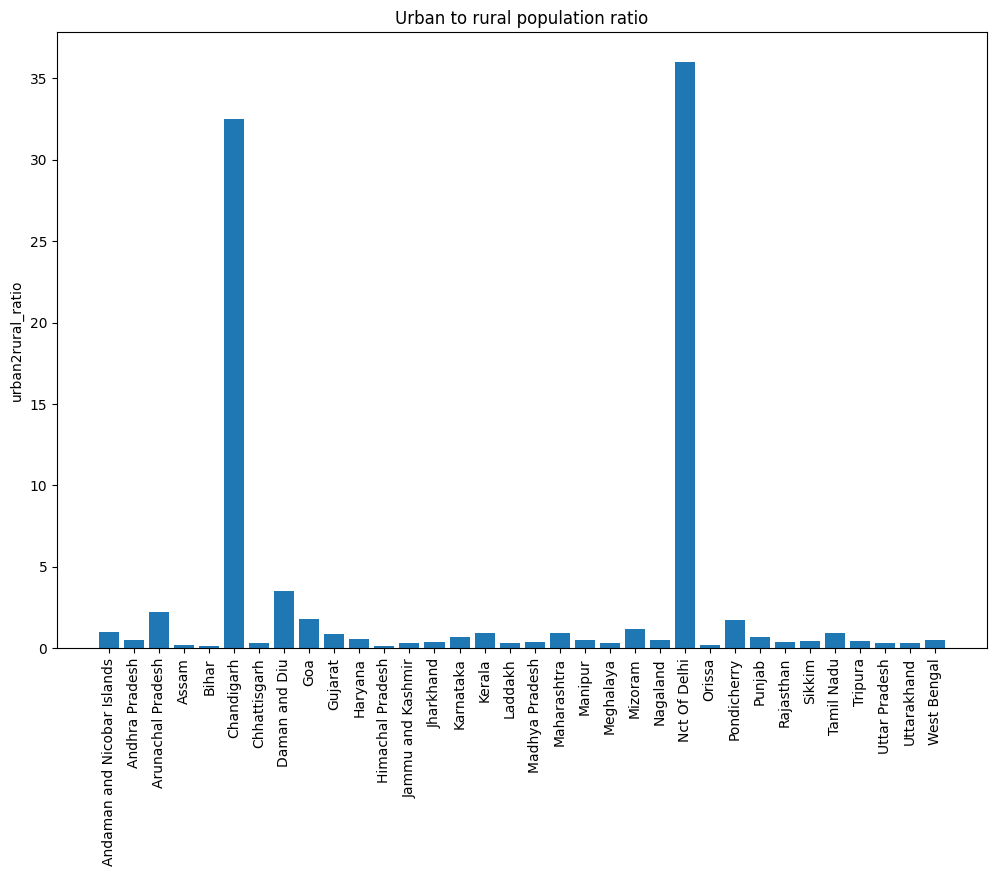

In [18]:
urban2rural_df = (vis_merge.groupby('State/UT')['Households', 'Households_Rural', 'Households_Urban'].sum()).reset_index()
urban2rural_ratio = [round(i,2) for i in urban2rural_df['Households_Urban']/urban2rural_df['Households_Rural']]

plot_bars(states, urban2rural_ratio, y_label='urban2rural_ratio', title='Urban to rural population ratio')
